# Data exploration of simulated events
## Data import

In [1]:
# Imports
from master_scripts.data_functions import *
from master_scripts.analysis_functions import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [4]:
# CeBr2Mil_Mix.txt -> 2 million mixed samples of simulated events
REPO_ROOT = get_git_root()
DATA_PATH = REPO_ROOT + "data/sample/"

# ================== Import Data ==================
#images = np.load(DATA_PATH + "images_full.npy")
#positions = np.load(DATA_PATH + "positions_full.npy")
#energies = np.load(DATA_PATH + "energies_full.npy")
#labels = np.load(DATA_PATH + "labels_full.npy")
images = np.load(DATA_PATH + "images_sample.npy")
positions = np.load(DATA_PATH + "positions_sample.npy")
energies = np.load(DATA_PATH + "energies_sample.npy")
labels = np.load(DATA_PATH + "labels_sample.npy")

In [3]:
# CeBr2Mil_Mix.txt -> 2 million mixed samples of simulated events
REPO_ROOT = get_git_root()
DATA_PATH = REPO_ROOT + "data/simulated/"

# ================== Import Data ==================
#images = np.load(DATA_PATH + "images_full.npy")
#positions = np.load(DATA_PATH + "positions_full.npy")
#energies = np.load(DATA_PATH + "energies_full.npy")
#labels = np.load(DATA_PATH + "labels_full.npy")

positions = np.load(DATA_PATH + "positions_full_pixelmod_imbalanced.npy")
s, d, c = event_indices(positions)
print(len(s), len(d), len(c))

950059 47502 618


In [5]:
# Number of events and shape of array check
n_classes = len(np.unique(labels))

print("Number of classes: {}".format(n_classes))
print("Number of events: {}".format(images.shape[0]))
print("Images shape: {}".format(images.shape))
print("Energies shape: {}".format(energies.shape))
print("Positions shape: {}".format(positions.shape))
print("Labels shape: {}".format(labels.shape))

Number of classes: 2
Number of events: 10000
Images shape: (10000, 16, 16, 1)
Energies shape: (10000, 2)
Positions shape: (10000, 4)
Labels shape: (10000, 1)


In [6]:
# Get sets of indices for separate event types
single, double, close = event_indices(positions)

# Get relative energies and separation distances
sep_dist = separation_distance(positions)
rel_e = relative_energy(energies)

# Basic statistical properties
Means, standard deviations etc.

## Images
num_observations, (min, max), mean, variance, skewness, kurtosis

In [7]:
stats_images = stats.describe(images)
stats_images_single = stats.describe(images[single])
stats_images_double = stats.describe(images[double])

In [8]:
# Print maximum and minimum pixel values seen in image data
print("{:15s}|{:^15s}|{:^15s}|{:^15s}|{:^15s}".format(
    "Image set",
    "pixel min",
    "pixel max",
    "pixel mean",
    "pixel STD (mean)"))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "All images", 
    np.amin(stats_images.minmax[0]),
    np.amax(stats_images.minmax[1]),
    np.mean(stats_images.mean),
    np.mean(np.sqrt(stats_images.variance))))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "Singles", 
    np.amin(stats_images_single.minmax[0]),
    np.amax(stats_images_single.minmax[1]),
    np.mean(stats_images_single.mean),
    np.mean(np.sqrt(stats_images_single.variance))))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "Doubles", 
    np.amin(stats_images_double.minmax[0]),
    np.amax(stats_images_double.minmax[1]),
    np.mean(stats_images_double.mean),
    np.mean(np.sqrt(stats_images_double.variance))))

Image set      |   pixel min   |   pixel max   |  pixel mean   |pixel STD (mean)
All images     |     0.00      |    9951.00    |    157.71     |    429.60     
Singles        |     0.00      |    8033.00    |    105.90     |    350.03     
Doubles        |     0.00      |    9951.00    |    209.57     |    490.51     


In [13]:
img_sum = np.sum(images, axis=(1,2))
print("Mean sum:", np.mean(img_sum))
print("Mean sum single :", np.mean(img_sum[single]))
print("Mean sum double :", np.mean(img_sum[double]))

Mean sum: 40374.0946
Mean sum single : 27109.658736505397
Mean sum double : 53649.1462585034


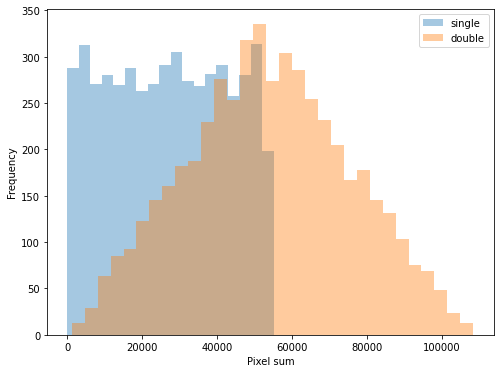

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(img_sum[single], kde=False, label='single', ax=ax)
sns.distplot(img_sum[double], kde=False, label='double', ax=ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel sum")
ax.legend()

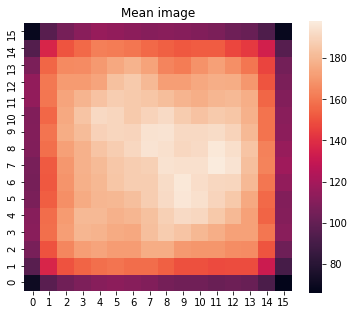

In [53]:
# Plot the mean image
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(stats_images[2].reshape((16,16)), ax=ax, square=True)
ax.set_title("Mean image")
ax.invert_yaxis()

## Positions
nobs, minmax, mean, variance, skewness, kurtosis

In [111]:
stats_positions = stats.describe(positions)
stats_positions_single = stats.describe(positions[single])
stats_positions_double = stats.describe(positions[double])

In [132]:
print("---------- All positions")
pprint(dict(stats_positions._asdict()))
print("STD in coords:", np.sqrt(stats_positions.variance))
print("\n---------- Singles:")
pprint(dict(stats_positions_single._asdict()))
print("STD in coords:", np.sqrt(stats_positions_single.variance))
print("\n----------- Doubles:")
pprint(dict(stats_positions_double._asdict()))
print("STD in coords:", np.sqrt(stats_positions_double.variance))

---------- All positions
{'kurtosis': array([-1.1802267 , -1.20099322, -1.98789951, -1.98785827]),
 'mean': array([  7.9895305 ,   7.98056199, -46.00612341, -46.04153643]),
 'minmax': (array([   0.669378,    0.667048, -100.      , -100.      ]),
            array([15.3322, 15.3287, 15.3307, 15.3314])),
 'nobs': 10000,
 'skewness': array([0.00956452, 0.01232348, 0.00986787, 0.00988899]),
 'variance': array([  17.78535448,   18.07963143, 2926.82788938, 2923.00579721])}
STD in coords: [ 4.2172686   4.25201498 54.10016534 54.06482958]

---------- Singles:
{'kurtosis': array([-1.16872583, -1.19228361, -3.        , -3.        ]),
 'mean': array([   8.00267327,    7.98508928, -100.        , -100.        ]),
 'minmax': (array([   0.673776,    0.667048, -100.      , -100.      ]),
            array([  15.3322,   15.3287, -100.    , -100.    ])),
 'nobs': 5002,
 'skewness': array([0.01536561, 0.00515536, 0.        , 0.        ]),
 'variance': array([17.64319933, 17.80804779,  0.        ,  0.    

## Energies

In [88]:
stats_energies = stats.describe(energies)
stats_energies_single = stats.describe(energies[single])
stats_energies_double = stats.describe(energies[double])

In [133]:
print("---------- All energies")
pprint(dict(stats_energies._asdict()))
print("STD in energies:", np.sqrt(stats_energies.variance))
print("\n---------- Singles:")
pprint(dict(stats_energies_single._asdict()))
print("STD in energies:", np.sqrt(stats_energies_single.variance))
print("\n----------- Doubles:")
pprint(dict(stats_energies_double._asdict()))
print("STD in energies:", np.sqrt(stats_energies_double.variance))

---------- All energies
{'kurtosis': array([-1.19460655, -0.59837564]),
 'mean': array([0.50378424, 0.24757837]),
 'minmax': (array([9.67989e-05, 0.00000e+00]), array([0.999913, 0.999863])),
 'nobs': 10000,
 'skewness': array([-0.03139285,  0.94121651]),
 'variance': array([0.08354483, 0.10285198])}
STD in energies: [0.28904123 0.32070545]

---------- Singles:
{'kurtosis': array([-1.2233669, -3.       ]),
 'mean': array([0.50519574, 0.        ]),
 'minmax': (array([0.00011332, 0.        ]), array([0.999913, 0.      ])),
 'nobs': 5002,
 'skewness': array([-0.02354336,  0.        ]),
 'variance': array([0.08565921, 0.        ])}
STD in energies: [0.29267595 0.        ]

----------- Doubles:
{'kurtosis': array([-1.16560834, -1.20922615]),
 'mean': array([0.50237162, 0.49535489]),
 'minmax': (array([9.67989e-05, 1.89248e-04]), array([0.999753, 0.999863])),
 'nobs': 4998,
 'skewness': array([-0.0406226 ,  0.01530509]),
 'variance': array([0.08144149, 0.08304501])}
STD in energies: [0.285379

# Correlation analysis
Look for correlations between energies and positions

[Text(0, 0.5, 'E1'), Text(0, 1.5, 'px_sum'), Text(0, 2.5, 'hip')]

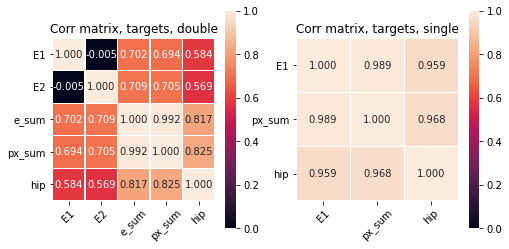

In [43]:
# Concatenate the quantities of interest and draw a reasonable sample size
# from the data to perform calculation on. When the data is huge, this is
# a necessity because np.corrcoef doesn't scale well.
img_sum = np.sum(images, axis=(1,2)).reshape(images.shape[0], 1)
img_hip = np.amax(images, axis=(1,2)).reshape(images.shape[0], 1)
e_sum = np.sum(energies, axis=1).reshape(10000,1)
#correlation_data = np.concatenate((positions, energies, sep_dist, rel_e, img_sum, img_hip), axis=1)
correlation_data = np.concatenate((energies, e_sum, img_sum, img_hip), axis=1)
correlation_data_single = np.concatenate((energies[:,0].reshape(energies.shape[0],1), img_sum, img_hip), axis=1)
indices = np.random.choice(double, 4000, replace=False)

# Calculate correlation matrix
corr_matrix = np.corrcoef(correlation_data[double], rowvar=False)
corr_matrix_single = np.corrcoef(correlation_data_single[single], rowvar=False)

# Plot the correlation matrix
fig, ax = plt.subplots(1, 2, figsize=(8,4))
#ticks = ["X1", "Y1", "X2", "Y2", "E1", "E2", "sep_dist", "rel_E", "px_sum", "hip"]
ticks = ["E1", "E2", "e_sum", "px_sum", "hip"]
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.3f',
    linewidth=0.2,
    square=True,
    ax=ax[0],
    vmin=0,
    vmax=1
)
ax[0].set_title("Corr matrix, targets, double")
ax[0].set_xticklabels(ticks, rotation=45)
ax[0].set_yticklabels(ticks, rotation=0)

ticks_single = ["E1", "px_sum", "hip"]
sns.heatmap(
    corr_matrix_single,
    annot=True,
    fmt='.3f',
    linewidth=0.2,
    square=True,
    ax=ax[1],
    vmin=0,
    vmax=1
)

ax[1].set_title("Corr matrix, targets, single")
ax[1].set_xticklabels(ticks_single, rotation=45)
ax[1].set_yticklabels(ticks_single, rotation=0)

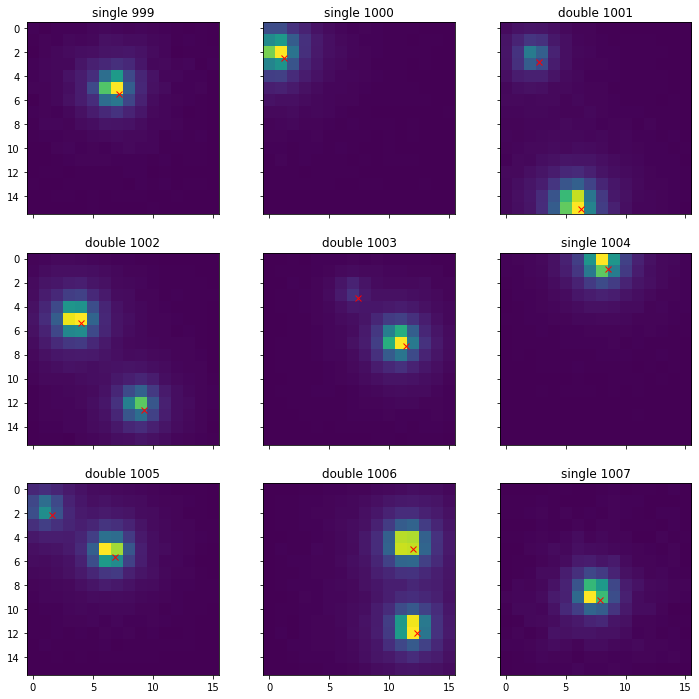

In [58]:
# Plot some images, with electron origin positions
%matplotlib inline

images_p = images.reshape(images.shape[0],16,16)
index = 999
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].imshow(images_p[index + i*3 + j].T)
        
        # plot origin of event
        x = positions[index + i*3 + j, 0]
        y = positions[index + i*3 + j, 1]
        ax[i, j].plot(x, y, 'rx')
        ax[i, j].set_title('single ' + str(index + i*3 + j))
        if positions[index + i*3 + j, 3] != -100:
            x2 = positions[index + i*3 + j, 2]
            y2 = positions[index + i*3 + j, 3]
            ax[i, j].plot(x2, y2, 'rx')
            ax[i, j].set_title('double ' + str(index + i*3 + j))
        
plt.show()

831


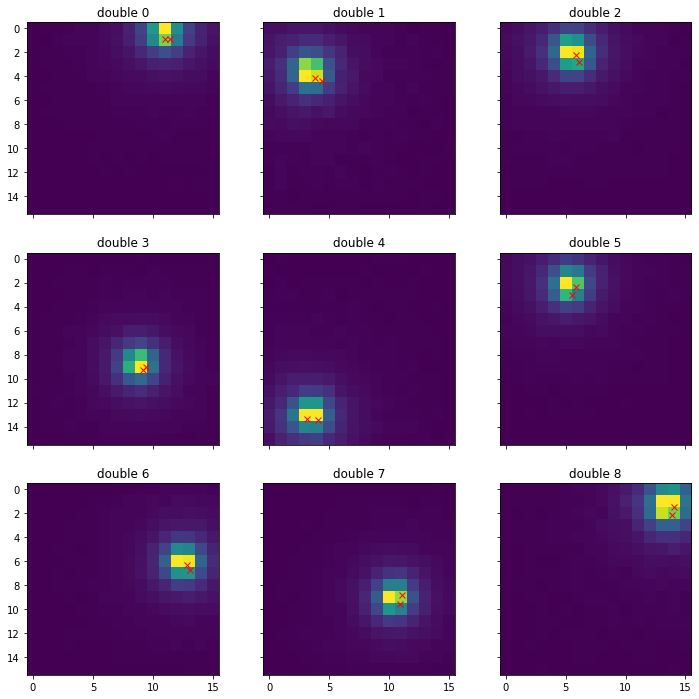

In [53]:
images_p = images.reshape(images.shape[0],16,16)[close]
index = 0
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].imshow(images_p[index + i*3 + j].T)
        
        # plot origin of event
        x = positions[close][index + i*3 + j, 0]
        y = positions[close][index + i*3 + j, 1]
        ax[i, j].plot(x, y, 'rx')
        ax[i, j].set_title('single ' + str(index + i*3 + j))
        if positions[close][index + i*3 + j, 3] != -100:
            x2 = positions[close][index + i*3 + j, 2]
            y2 = positions[close][index + i*3 + j, 3]
            ax[i, j].plot(x2, y2, 'rx')
            ax[i, j].set_title('double ' + str(index + i*3 + j))

print(close[5])

In [73]:

d_easy = images[1001].reshape(16,16)
d_hard = images[831].reshape(16,16)
s = images[999].reshape(16,16)

# s, d_easy, d_hard
exp_img = np.load(REPO_ROOT + "data/real/samples_thesis.npy")
s_exp = exp_img[0].reshape(16,16)
d_easy_exp = exp_img[1].reshape(16,16)
d_hard_exp = exp_img[2].reshape(16,16)


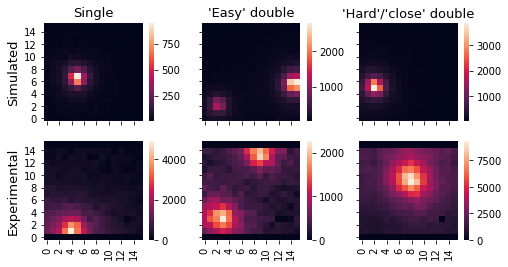

In [111]:
fig, ax = plt.subplots(2, 3, figsize=(8, 4), sharex=True, sharey=True)
fsize = 13
sns.heatmap(s, square=True, ax=ax[0,0], cbar=True, rasterized=True)
ax[0,0].invert_yaxis()
ax[0,0].set_title("Single", fontsize=fsize)
ax[0,0].set_ylabel("Simulated", fontsize=fsize)

sns.heatmap(d_easy, square=True, ax=ax[0,1], cbar=True, rasterized=True)
ax[0,1].invert_yaxis()
ax[0,1].set_title("'Easy' double", fontsize=fsize)

sns.heatmap(d_hard, square=True, ax=ax[0,2], cbar=True, rasterized=True)
ax[0,2].invert_yaxis()
ax[0,2].set_title("'Hard'/'close' double", fontsize=fsize)

sns.heatmap(s_exp, square=True, ax=ax[1,0], cbar=True, rasterized=True)
ax[1,0].invert_yaxis()
#ax[1,0].set_title("Single")
ax[1,0].set_ylabel("Experimental", fontsize=fsize)

sns.heatmap(d_easy_exp, square=True, ax=ax[1,1], cbar=True, rasterized=True)
ax[1,1].invert_yaxis()
#ax[1,1].set_title("'Easy' double")

sns.heatmap(d_hard_exp, square=True, ax=ax[1,2], cbar=True, rasterized=True)
ax[1,2].invert_yaxis()
#ax[1,2].set_title("'Hard'/'close' double")

section_path = "chapters/theory/figures/"
THESIS_PATH = "../../../master_thesis/"
fig.savefig(THESIS_PATH + section_path + 'detector_image_samples.pdf')